In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from sklearn import datasets, linear_model

In [4]:
data = pd.read_csv('sat.txt', sep = ' ' )
data.head()

,high_GPA,math_SAT,verb_SAT,comp_GPA,univ_GPA
0,3.45,643,589,3.76,3.52
1,2.78,558,512,2.87,2.91
2,2.52,583,503,2.54,2.40
3,3.67,685,602,3.83,3.47
4,3.24,592,538,3.29,3.47


In [5]:
x = data[['high_GPA']]
y = data['univ_GPA']

In [6]:
x[:5]

,high_GPA
0,3.45
1,2.78
2,2.52
3,3.67
4,3.24


In [7]:
y[:5]

0    3.52
1    2.91
2    2.40
3    3.47
4    3.47
Name: univ_GPA, dtype: float64

In [8]:
regr = linear_model.LinearRegression()
regr.fit( x, y ) #fit метод для обучения модели

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

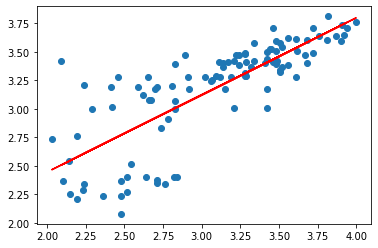

In [9]:
plt.scatter( x, y )
plt.plot( x, regr.predict( x ), color = 'red' )
plt.show()

Предсказать вид спорта по параметрам спортсмена

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [10]:
sports = pd.read_csv( 'athletes.csv' )
sports.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [12]:
# обнуляем ячейки с отсутствием данных
sports = sports[ pd.isnull( sports['height'] ) == 0 ]
sports = sports[ pd.isnull( sports['weight'] ) == 0 ]

In [13]:
sports.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [39]:
# Посмотрим, как вес играет на выбранный спорт
selectedColumns = sports[ [ 'weight', 'sport', 'height' ] ]

# столбец sport является категориальной переменной
# переведем ее в значения 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies( selectedColumns, columns = [ 'sport' ] )

# столбец weight является целевой переменной, удаляем его из X
del X['weight']

X.head()

,height,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_canoe,sport_cycling,sport_equestrian,sport_fencing,sport_football,sport_golf,sport_gymnastics,sport_handball,sport_hockey,sport_judo,sport_modern pentathlon,sport_rowing,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.68,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.98,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1.81,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
# целевая переменная (столбец weight) снова является категориальной
# переведем значения столбца в числа, оставив один столбец

le = LabelEncoder()

In [41]:
le.fit( sports['weight'] )

LabelEncoder()

In [42]:
le.classes_

array([ 31.,  33.,  34.,  35.,  36.,  37.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 130., 132., 133.,
       134., 135., 136., 137., 138., 139., 140., 142., 143., 144., 145.,
       146., 148., 149., 150., 152., 154., 155., 157., 159., 160., 163.,
       165., 170.])

In [43]:
# пример "расшировки" столбца "вес"
le.transform( [ 31, 100, 121 ] )

array([ 0, 67, 88])

In [44]:
# записываем в переменную y преобразованный столбец weight

y = pd.Series( data = le.transform( sports['weight'] ) )
y.head()

0    31
1    23
2    46
3    47
4    38
dtype: int64

In [45]:
model = LogisticRegression()

In [46]:
X

,height,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_canoe,sport_cycling,sport_equestrian,sport_fencing,sport_football,sport_golf,sport_gymnastics,sport_handball,sport_hockey,sport_judo,sport_modern pentathlon,sport_rowing,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.68,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.98,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1.81,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11533,1.64,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11534,1.73,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11535,1.85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11536,1.60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [47]:
# обучаем модель

model.fit( X, y )
predictions = model.predict_proba( X )

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [49]:
predictions[:5]

array([[1.01391054e-04, 1.03582069e-04, 1.62443948e-04, 1.83849116e-04,
        1.06107871e-04, 1.81138476e-04, 7.56437940e-04, 1.50823569e-03,
        5.70632552e-04, 4.10232704e-03, 6.72487816e-03, 4.64760784e-03,
        1.17955396e-02, 1.15615011e-02, 1.11671493e-02, 1.75011972e-02,
        1.42054010e-02, 3.21466006e-02, 1.46218244e-02, 3.01407271e-02,
        2.90470666e-02, 3.14183212e-02, 4.16066849e-02, 3.09098024e-02,
        3.27946750e-02, 5.37630881e-02, 3.09200620e-02, 4.61182502e-02,
        2.67605847e-02, 3.48507903e-02, 3.72704906e-02, 2.92742851e-02,
        4.30036012e-02, 2.00022928e-02, 1.63767059e-02, 2.85062564e-02,
        1.50825598e-02, 3.99882806e-02, 7.31182198e-03, 2.06150875e-02,
        1.19264825e-02, 1.56553750e-02, 1.48944098e-02, 1.11444564e-02,
        1.15793926e-02, 1.19332597e-02, 7.87125961e-03, 1.23654683e-02,
        6.81384771e-03, 7.41119237e-03, 8.81723081e-03, 6.37405544e-03,
        6.78479329e-03, 4.98091023e-03, 3.72776105e-03, 4.506165

In [50]:
# сравниваем факт с предсказаниями
# (да, сравнивать предсказания с самими данными не круто, лучше было разбить на обучающую и тестовую выборку)

zip( predictions[:, 1], y )

In [51]:
model.predict(X)

array([25, 27, 47, ..., 42, 36, 37])

In [52]:
model.score(X, y) #зависимость веса от выбранного спорта крайне мала

0.09274267820961503